To get started and be able to download the data:

- Join the competition and accept rules
- Download your Kaggle credentials file
- If you're running in Saturn Cloud, configure your instance to have access to access the kaggle credentials



## 1. Getting the Data

Execute the following cell once to download the data in Saturn Jupyter Notebook or in Saturn terminal without `!`

In [1]:
#!kaggle competitions download -c kitchenware-classification
#!mkdir data
#!unzip kitchenware-classification.zip -d data > /dev/null
#!rm kitchenware-classification.zip

In [2]:
!ls

core.8211			 xception_v1_01_0.864.h5
data				 xception_v1_02_0.870.h5
kitchenware-jupyter-recipe.json  xception_v1_03_0.878.h5
model_v1.h5			 xception_v1_04_0.882.h5
notebook.ipynb			 xception_v1_05_0.883.h5
README.md			 xception_v1_09_0.885.h5
submission.csv


## 2. Doiong the necessary imports

In [3]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import cv2
from PIL import Image

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

2022-12-20 09:48:11.878480: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## 3. Loading the dataframe

In [4]:
df = pd.read_csv('data/train.csv', dtype={'Id': str})
df['filename'] = 'data/images/' + df['Id'] + '.jpg'
df['imagename'] = df['Id'] + '.jpg'
df.head()

,Id,label,filename,imagename
0,0560,glass,data/images/0560.jpg,0560.jpg
1,4675,cup,data/images/4675.jpg,4675.jpg
2,0875,glass,data/images/0875.jpg,0875.jpg
3,4436,spoon,data/images/4436.jpg,4436.jpg
4,8265,plate,data/images/8265.jpg,8265.jpg


## 4. splitting dataframe into train, test and validation

In [5]:
train_cutoff = int(len(df) * 0.6)
full_train_cutoff = int(len(df) * 0.8)

df_train = df[:train_cutoff]
df_val = df[train_cutoff:full_train_cutoff]
df_test = df[full_train_cutoff:]
df_full_train = df[:full_train_cutoff]

## 5. EDA

### 5.1 number of images and classes

In [6]:
len(df), len(df_train), len(df_val), len(df_test), len(df_full_train)

(5559, 3335, 1112, 1112, 4447)

In [7]:
print("for df:")
print(df.describe())

print('\n')
print("df_train:")
print(df_train.describe())

print('\n')
print("df_val:")
print(df_val.describe())

print('\n')
print("df_test:")
print(df_test.describe())

print('\n')
print("df_full_train:")
print(df_full_train.describe())

for df:
          Id  label              filename imagename
count   5559   5559                  5559      5559
unique  5559      6                  5559      5559
top     0560  plate  data/images/0560.jpg  0560.jpg
freq       1   1227                     1         1


df_train:
          Id  label              filename imagename
count   3335   3335                  3335      3335
unique  3335      6                  3335      3335
top     0560  plate  data/images/0560.jpg  0560.jpg
freq       1    738                     1         1


df_val:
          Id  label              filename imagename
count   1112   1112                  1112      1112
unique  1112      6                  1112      1112
top     3496  plate  data/images/3496.jpg  3496.jpg
freq       1    248                     1         1


df_test:
          Id  label              filename imagename
count   1112   1112                  1112      1112
unique  1112      6                  1112      1112
top     0216  plate  da

We see that all datasets after splitting have also 6 classes

### 5.2 names of classes and their frequencies

In [8]:
df.head()

,Id,label,filename,imagename
0,0560,glass,data/images/0560.jpg,0560.jpg
1,4675,cup,data/images/4675.jpg,4675.jpg
2,0875,glass,data/images/0875.jpg,0875.jpg
3,4436,spoon,data/images/4436.jpg,4436.jpg
4,8265,plate,data/images/8265.jpg,8265.jpg


In [9]:
df['label'].nunique()

6

In [10]:
df['label'].value_counts()

plate    1227
cup      1135
spoon     989
knife     909
glass     742
fork      557
Name: label, dtype: int64

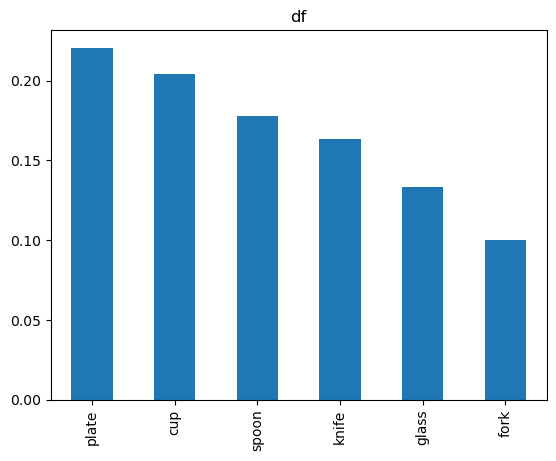

In [11]:
# Get the counts of unique values in the "label" column
counts_df = df["label"].value_counts(normalize = True)
# Plot the frequencies as a histogram
counts_df.plot(kind="bar")

# Show the plot
plt.title("df")
plt.show()

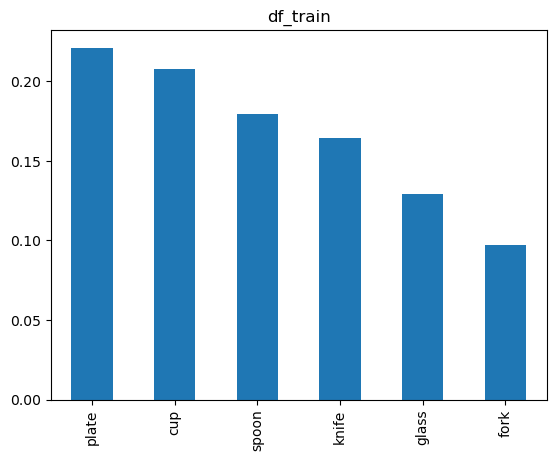

In [12]:
counts_df_train = df_train["label"].value_counts(normalize = True)
counts_df_train.plot(kind="bar")
plt.title("df_train")
plt.show()

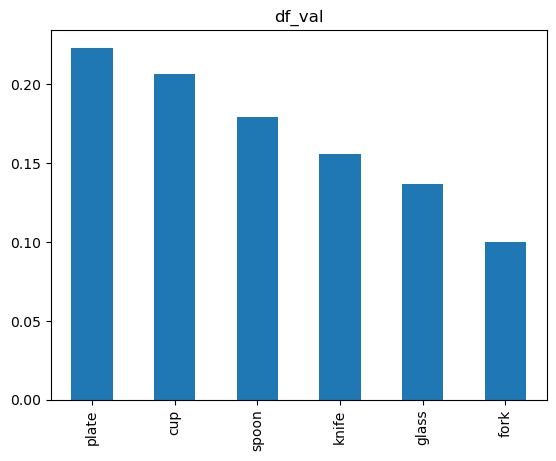

In [13]:
counts_df_val = df_val["label"].value_counts(normalize = True)
counts_df_val.plot(kind="bar")
plt.title("df_val")
plt.show()

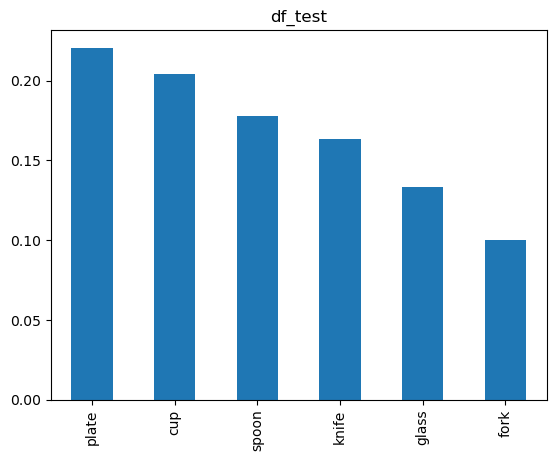

In [14]:
counts_df_test = df["label"].value_counts(normalize = True)
counts_df_test.plot(kind="bar")
plt.title("df_test")
plt.show()

In [15]:
## plot all above plots in one plot with the below template, when you get time
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

### 5.3 random visual assessment of few images

In [16]:
df_train.head()

,Id,label,filename,imagename
0,0560,glass,data/images/0560.jpg,0560.jpg
1,4675,cup,data/images/4675.jpg,4675.jpg
2,0875,glass,data/images/0875.jpg,0875.jpg
3,4436,spoon,data/images/4436.jpg,4436.jpg
4,8265,plate,data/images/8265.jpg,8265.jpg


In [17]:
df_train['filename'][100]

'data/images/2967.jpg'

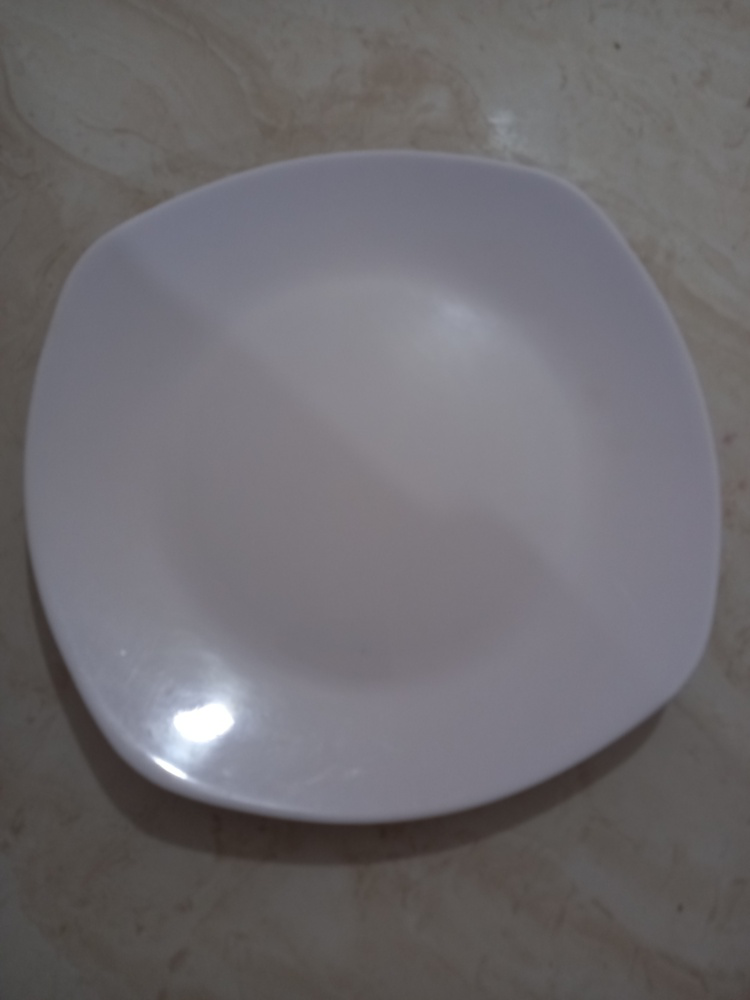

In [18]:
#load one random image
load_img(df_train['filename'][100])

In [19]:
path = os.getcwd()
path

'/home/jovyan/workspace/kitchenware-competition-starter'

In [20]:
os.chdir(path+"/data/images/")

In [21]:
df['imagename'] = df['Id'] + '.jpg'

In [22]:
df.head()

,Id,label,filename,imagename
0,0560,glass,data/images/0560.jpg,0560.jpg
1,4675,cup,data/images/4675.jpg,4675.jpg
2,0875,glass,data/images/0875.jpg,0875.jpg
3,4436,spoon,data/images/4436.jpg,4436.jpg
4,8265,plate,data/images/8265.jpg,8265.jpg


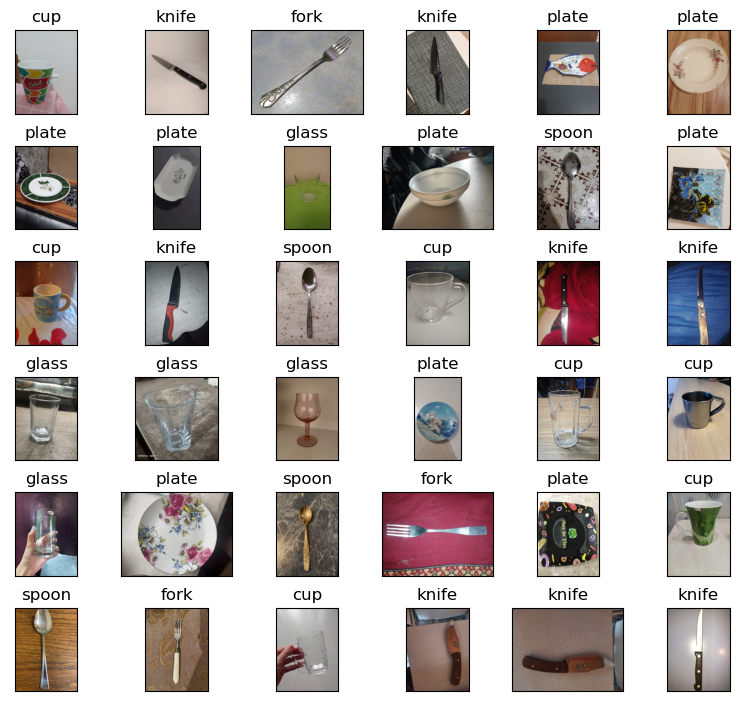

In [23]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    random = np.random.randint(1, len(df))
    ax.imshow(plt.imread(df.imagename[random]))
    ax.set_title(df.label[random], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

### 5.4 Distribution of images size (kb) and resolution (width and height in pixels)

In [24]:
for image in glob.glob("*.jpg"):
    df["image_size(kB)"] = round((os.path.getsize(image)/1000),2)
    img = Image.open(image)
    width, height = img.size
    df["image_width(pixel)"]= width
    df["image_height(pixel)"]= height

In [25]:
df.head()

,Id,label,filename,imagename,image_size(kB),image_width(pixel),image_height(pixel)
0,0560,glass,data/images/0560.jpg,0560.jpg,150.06,750,1000
1,4675,cup,data/images/4675.jpg,4675.jpg,150.06,750,1000
2,0875,glass,data/images/0875.jpg,0875.jpg,150.06,750,1000
3,4436,spoon,data/images/4436.jpg,4436.jpg,150.06,750,1000
4,8265,plate,data/images/8265.jpg,8265.jpg,150.06,750,1000


Now let's check some properties of the images.

In [26]:
df['image_size(kB)'].describe().apply("{0:.5f}".format)

count    5559.00000
mean      150.06000
std         0.00000
min       150.06000
25%       150.06000
50%       150.06000
75%       150.06000
max       150.06000
Name: image_size(kB), dtype: object

Thus, all images are of same size in kB.

In [27]:
df['image_width(pixel)'].describe().apply("{0:.5f}".format)

count    5559.00000
mean      750.00000
std         0.00000
min       750.00000
25%       750.00000
50%       750.00000
75%       750.00000
max       750.00000
Name: image_width(pixel), dtype: object

Thus, all images are of same width i.e 750 pixels.

In [28]:
df['image_height(pixel)'].describe().apply("{0:.5f}".format)

count    5559.00000
mean     1000.00000
std         0.00000
min      1000.00000
25%      1000.00000
50%      1000.00000
75%      1000.00000
max      1000.00000
Name: image_height(pixel), dtype: object

Thus, all images are of same height i.e. 1000 pixels.

In [29]:
# Let's check size of an array of an image 
img = load_img(df['imagename'][100], target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

## 6. Training with Pre-trained convolutional neural networks: Base Model 

We'll use a pre-trained CNN model (Xception) from keras applications and then we'll use transfer learning to adjust to our use case. We'll built on top of this pre-trained Imagenet model. 

In [30]:
os.chdir(path)
os.getcwd()

'/home/jovyan/workspace/kitchenware-competition-starter'

In [31]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
df_train.head()

,Id,label,filename,imagename
0,0560,glass,data/images/0560.jpg,0560.jpg
1,4675,cup,data/images/4675.jpg,4675.jpg
2,0875,glass,data/images/0875.jpg,0875.jpg
3,4436,spoon,data/images/4436.jpg,4436.jpg
4,8265,plate,data/images/8265.jpg,8265.jpg


In [33]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
)

Found 3335 validated image filenames belonging to 6 classes.
Found 1112 validated image filenames belonging to 6 classes.


### Let's create the base model first

In [34]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

#let's create a new top
# inputs for base model
inputs = keras.Input(shape=(150, 150, 3))

#apply base model to inputs
base = base_model(inputs, training=False)  
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(6)(vectors) #we have 6 classes

model = keras.Model(inputs, outputs)

2022-12-20 09:49:45.491449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 09:49:45.497756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 09:49:45.498616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 09:49:45.500052: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

### using optimizer for changing weights

In this step, model learns something for our images and tries to change the weights.

In [35]:
# there are many other optimizers. We'll use Adam
# https://keras.io/api/optimizers/
# learning rate is similar to eta in xgboost
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

#lower the loss is better it is. We have multi classificatin, so we use categricalCrossentropy
#logits=True bceause we want to keep the raw score
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

Now it's complied and we are ready to train a model.

In [36]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


2022-12-20 09:50:12.990319: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-20 09:50:13.644111: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-20 09:50:13.645026: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-20 09:50:13.645066: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-20 09:50:13.646147: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-20 09:50:13.646242: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


105/105 [==============================] - 61s 537ms/step - loss: 0.7848 - accuracy: 0.8159 - val_loss: 0.7053 - val_accuracy: 0.8471
Epoch 2/10
105/105 [==============================] - 51s 485ms/step - loss: 0.3081 - accuracy: 0.9076 - val_loss: 0.6360 - val_accuracy: 0.8588
Epoch 3/10
105/105 [==============================] - 51s 487ms/step - loss: 0.2987 - accuracy: 0.9169 - val_loss: 0.7866 - val_accuracy: 0.8633
Epoch 4/10
105/105 [==============================] - 51s 483ms/step - loss: 0.1440 - accuracy: 0.9580 - val_loss: 0.7264 - val_accuracy: 0.8660
Epoch 5/10
105/105 [==============================] - 51s 484ms/step - loss: 0.0932 - accuracy: 0.9700 - val_loss: 0.7784 - val_accuracy: 0.8597
Epoch 6/10
105/105 [==============================] - 50s 482ms/step - loss: 0.0561 - accuracy: 0.9805 - val_loss: 0.7656 - val_accuracy: 0.8651
Epoch 7/10
105/105 [==============================] - 50s 475ms/step - loss: 0.0357 - accuracy: 0.9874 - val_loss: 0.7272 - val_accuracy: 0.8

Thus, we see that training accuracy increases with each epoch, however validation accuracy is highest for epoch = 2

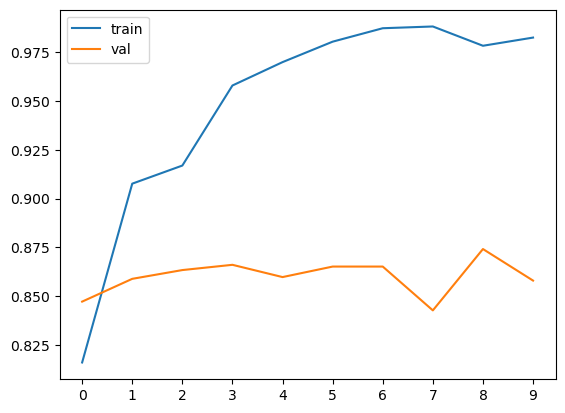

In [37]:
#let's plot accuracy on training data and on validation data
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

Thus, epoch = 2 is the best echo with 87% accuracy aprx., although there is some overfitting with it. Epoch 9 is the highest but with lots of overfitting.

## 7. Parameter tuning by adjusting the learning rate

In [38]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [39]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_generator,epochs=10,validation_data=val_generator)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
105/105 [==============================] - 53s 486ms/step - loss: 1.4269 - accuracy: 0.4603 - val_loss: 0.9654 - val_accuracy: 0.7131
Epoch 2/10
105/105 [==============================] - 50s 478ms/step - loss: 0.7699 - accuracy: 0.7676 - val_loss: 0.6616 - val_accuracy: 0.8085
Epoch 3/10
105/105 [==============================] - 50s 479ms/step - loss: 0.5774 - accuracy: 0.8225 - val_loss: 0.5456 - val_accuracy: 0.8399
Epoch 4/10
105/105 [==============================] - 50s 477ms/step - loss: 0.4875 - accuracy: 0.8462 - val_loss: 0.4864 - val_accuracy: 0.8489
Epoch 5/10
105/105 [==============================] - 50s 476ms/step - loss: 0.4350 - accuracy: 0.8615 - val_loss: 0.4534 - val_accuracy: 0.8516
Epoch 6/10
105/105 [==============================] - 50s 478ms/step - loss: 0.3979 - accuracy: 0.8705 - val_loss: 0.4228 - val_accuracy: 0.8651
Epoch 7/10
105/105 [==============================] - 50s 479ms/step - loss: 0.3699 - accuracy: 0.8801 - val_loss: 0.4097 -

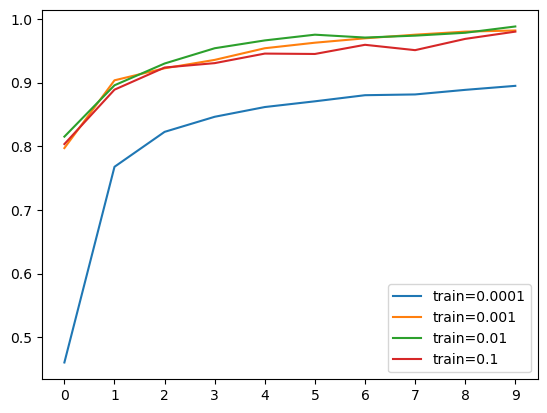

In [40]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    #plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

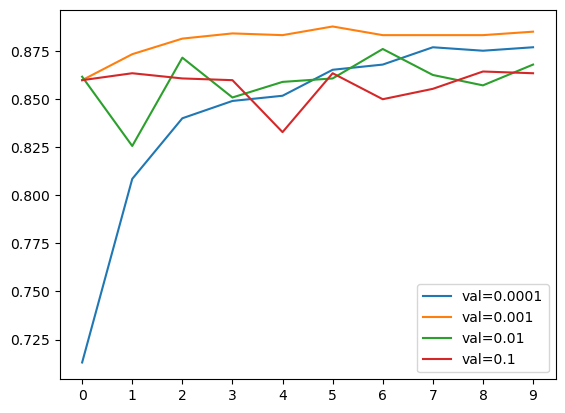

In [41]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

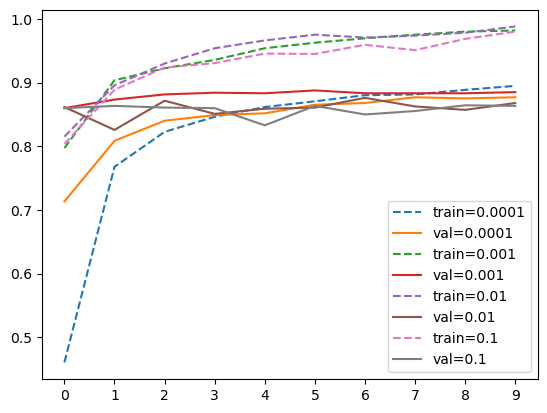

In [45]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'],'--', label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'],'-', label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In above picture, all dotted lines are for training and solid line are for validations. Thus 0.0001 is the best choice for learning rate.

In [46]:
#best learning rate
learning_rate = 0.0001

## Checkpointing

Idea of checkpointing is to save only the best model (or saving a model when certain conditions are met). We'll use it for saving the best model. We'll now train the model for best learning rate, run it for 10 epochs and out of them save the best model.

In [48]:
os.chdir(path)

In [49]:
os.getcwd()

'/home/jovyan/workspace/kitchenware-competition-starter'

In [50]:
#save the last model we trained
model.save_weights('model_v1.h5', save_format='h5')

In [51]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [52]:
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[chechpoint]
)

Epoch 1/10
105/105 [==============================] - 53s 485ms/step - loss: 1.2437 - accuracy: 0.5739 - val_loss: 0.8844 - val_accuracy: 0.7437
Epoch 2/10
105/105 [==============================] - 50s 473ms/step - loss: 0.7063 - accuracy: 0.7985 - val_loss: 0.6294 - val_accuracy: 0.8147
Epoch 3/10
105/105 [==============================] - 50s 475ms/step - loss: 0.5437 - accuracy: 0.8336 - val_loss: 0.5338 - val_accuracy: 0.8345
Epoch 4/10
105/105 [==============================] - 50s 480ms/step - loss: 0.4676 - accuracy: 0.8546 - val_loss: 0.4809 - val_accuracy: 0.8525
Epoch 5/10
105/105 [==============================] - 50s 476ms/step - loss: 0.4199 - accuracy: 0.8609 - val_loss: 0.4477 - val_accuracy: 0.8597
Epoch 6/10
105/105 [==============================] - 50s 478ms/step - loss: 0.3873 - accuracy: 0.8681 - val_loss: 0.4260 - val_accuracy: 0.8669
Epoch 7/10
105/105 [==============================] - 50s 479ms/step - loss: 0.3619 - accuracy: 0.8777 - val_loss: 0.4089 - val_ac

Above we see that validation accuracy improves with almost each epoch. Overfitting is very small. So as of now, we'll select the last model `xception_v1_10_0.874.h5` as the best model. We'll delete other saved model.

## Adding more layers

- We'll add one more ineer dense layers to our neural network 
- We'll experiment with different sizes of inner layer

In [53]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    #add one inner layer of size 100
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(6)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [58]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5', #v2 means with inner layer
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [59]:
learning_rate

0.0001

In [60]:
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[chechpoint])    
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
105/105 [==============================] - 53s 489ms/step - loss: 1.4935 - accuracy: 0.4612 - val_loss: 1.0676 - val_accuracy: 0.6897
Epoch 2/10
105/105 [==============================] - 49s 469ms/step - loss: 0.8390 - accuracy: 0.7820 - val_loss: 0.6841 - val_accuracy: 0.8291
Epoch 3/10
105/105 [==============================] - 50s 474ms/step - loss: 0.5903 - accuracy: 0.8414 - val_loss: 0.5415 - val_accuracy: 0.8534
Epoch 4/10
105/105 [==============================] - 50s 477ms/step - loss: 0.4771 - accuracy: 0.8633 - val_loss: 0.4724 - val_accuracy: 0.8669
Epoch 5/10
105/105 [==============================] - 50s 475ms/step - loss: 0.4138 - accuracy: 0.8792 - val_loss: 0.4422 - val_accuracy: 0.8705
Epoch 6/10
105/105 [==============================] - 50s 476ms/step - loss: 0.3728 - accuracy: 0.8837 - val_loss: 0.4059 - val_accuracy: 0.8795
Epoch 7/10
105/105 [==============================] - 49s 471ms/step - loss: 0.3416 - accuracy: 0.8960 - val_loss: 0.3884 - val

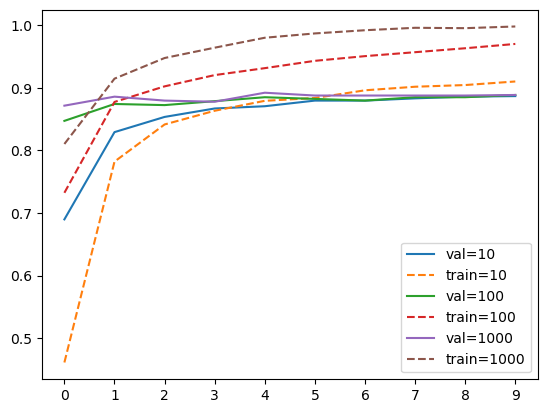

In [65]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    plt.plot(hist['accuracy'],'--', label=('train=%s' % size))

plt.xticks(np.arange(10))
#plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Thus, size 10  with accuracy of 0.887 has the lowest overfitting. We'll use this value of size further. We'll delete other models saved with checkpoint. 

In [67]:
size = 10

We will also tune number of inner layers and size of inner layers

## Regularization with dropout

Here we are adding drpout to the inner layer. This is way to perform regularization.

In [68]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [70]:
learning_rate, size

(0.0001, 10)

In [71]:
#v3 model means with dropout
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5', #v2 means with inner layer
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [73]:
scores = {}

for droprate in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_generator, epochs=30, validation_data=val_generator,callbacks=[chechpoint])
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
105/105 [==============================] - 53s 483ms/step - loss: 1.4616 - accuracy: 0.4348 - val_loss: 1.1492 - val_accuracy: 0.6583
Epoch 2/30
105/105 [==============================] - 50s 474ms/step - loss: 0.9284 - accuracy: 0.7208 - val_loss: 0.7916 - val_accuracy: 0.7824
Epoch 3/30
105/105 [==============================] - 50s 473ms/step - loss: 0.6722 - accuracy: 0.8165 - val_loss: 0.6377 - val_accuracy: 0.8381
Epoch 4/30
105/105 [==============================] - 50s 476ms/step - loss: 0.5375 - accuracy: 0.8540 - val_loss: 0.5365 - val_accuracy: 0.8615
Epoch 5/30
105/105 [==============================] - 50s 473ms/step - loss: 0.4534 - accuracy: 0.8729 - val_loss: 0.4823 - val_accuracy: 0.8651
Epoch 6/30
105/105 [==============================] - 50s 473ms/step - loss: 0.3983 - accuracy: 0.8882 - val_loss: 0.4421 - val_accuracy: 0.8687
Epoch 7/30
105/105 [==============================] - 50s 476ms/step - loss: 0.3596 - accuracy: 0.8951 - val_loss: 0.4168 - va

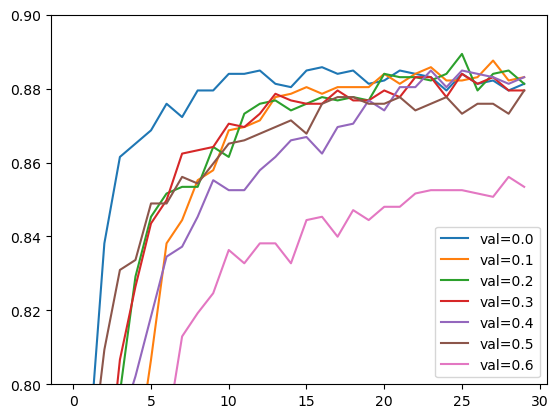

In [78]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.8, 0.90)
plt.legend()

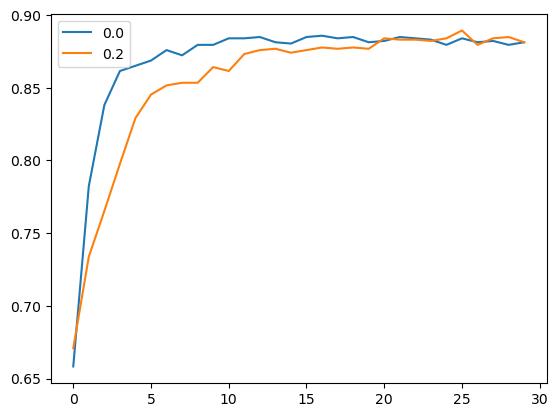

In [79]:
# final comparison between droprate of 0.0 and 0.2
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

**Conclusion** here is that `droprate` doesn't improve accuracy much therefore we'll go on from here with `droprate=0.0` 

In [82]:
droprate = 0.0

## Data augmentation

Here idea is to create more data from existing data and see if it improves training of images.

In [80]:
train_generator.class_indices

{'cup': 0, 'fork': 1, 'glass': 2, 'knife': 3, 'plate': 4, 'spoon': 5}

In [81]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  vertical_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
)

Found 3335 validated image filenames belonging to 6 classes.
Found 1112 validated image filenames belonging to 6 classes.


In [83]:
learning_rate, size, droprate

(0.0001, 10, 0.0)

In [84]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5', #v2 means with inner layer
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [85]:
model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=[chechpoint])

Epoch 1/50
105/105 [==============================] - 53s 484ms/step - loss: 1.6790 - accuracy: 0.2918 - val_loss: 1.4072 - val_accuracy: 0.4757
Epoch 2/50
105/105 [==============================] - 50s 474ms/step - loss: 1.2503 - accuracy: 0.5838 - val_loss: 1.0716 - val_accuracy: 0.6817
Epoch 3/50
105/105 [==============================] - 50s 476ms/step - loss: 0.9516 - accuracy: 0.7382 - val_loss: 0.8038 - val_accuracy: 0.7977
Epoch 4/50
105/105 [==============================] - 50s 478ms/step - loss: 0.7274 - accuracy: 0.8150 - val_loss: 0.6434 - val_accuracy: 0.8426
Epoch 5/50
105/105 [==============================] - 50s 473ms/step - loss: 0.5825 - accuracy: 0.8444 - val_loss: 0.5127 - val_accuracy: 0.8633
Epoch 6/50
105/105 [==============================] - 50s 473ms/step - loss: 0.4860 - accuracy: 0.8552 - val_loss: 0.4641 - val_accuracy: 0.8696
Epoch 7/50
105/105 [==============================] - 49s 470ms/step - loss: 0.4313 - accuracy: 0.8681 - val_loss: 0.4322 - val_ac

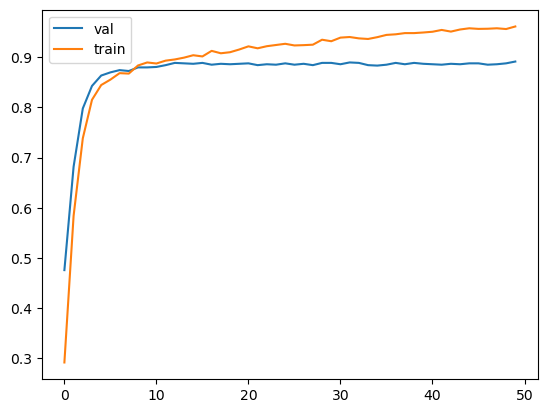

In [86]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

We see above that, after about 9 or 10 epochs, both validation and training accuracy improves. But it comes at the cost of overfitting. If we consider 10 epochs, then we achieve accuracy of 0.8795. So we cankeep the model `ception_v4_09_0.879.h5`. But this accuracy is still less than `xception_v3_26_0.889.h5`. So we'll delete also v4 model.

## Training a larger model

Here we'll train images of size 299x99 instead of 150x150. Till now we were using 150x150 images for saving computational resources.

In [87]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(6)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [88]:
input_size = 299

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='filename',
    y_col='label',
    target_size=(input_size, input_size),
    batch_size=32,
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_dataframe(
    df_val,
    x_col='filename',
    y_col='label',
    target_size=(input_size, input_size),
    batch_size=32,
)

In [90]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [91]:
learning_rate, size, droprate

(0.0001, 10, 0.0)

In [92]:
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=[checkpoint])

Epoch 1/50
105/105 [==============================] - 111s 1s/step - loss: 1.4824 - accuracy: 0.5217 - val_loss: 1.1463 - val_accuracy: 0.7707
Epoch 2/50
105/105 [==============================] - 106s 1s/step - loss: 0.9636 - accuracy: 0.7907 - val_loss: 0.8122 - val_accuracy: 0.8174
Epoch 3/50
105/105 [==============================] - 107s 1s/step - loss: 0.7231 - accuracy: 0.8291 - val_loss: 0.6386 - val_accuracy: 0.8444
Epoch 4/50
105/105 [==============================] - 106s 1s/step - loss: 0.5675 - accuracy: 0.8567 - val_loss: 0.5101 - val_accuracy: 0.8696
Epoch 5/50
105/105 [==============================] - 106s 1s/step - loss: 0.4646 - accuracy: 0.8783 - val_loss: 0.4346 - val_accuracy: 0.8885
Epoch 6/50
105/105 [==============================] - 106s 1s/step - loss: 0.3969 - accuracy: 0.9034 - val_loss: 0.3859 - val_accuracy: 0.9029
Epoch 7/50
105/105 [==============================] - 106s 1s/step - loss: 0.3465 - accuracy: 0.9178 - val_loss: 0.3427 - val_accuracy: 0.9164

From above experiment on 1. larger size of image and 2. using data augmentation with shear, zoom_range and horizontal flip, we conclude that:

- we get much better accuracy (above 0.9 ) compared to all other models.
- validation accuracy improves almost continuously after each epoch.
- just by visulazing, it seems that epoch=15 gives the best compromise between accuracy and overfitting with validation accuracy = 0.9541 and training accuracy = 0.9565
- Terefore, we keep the model `xception_v4_1_15_0.954.h5` and delete other models saved by checkpoint from this experiment 

## Training the final model on full_train dataset

- Train the final model for full training dataset. Till now we were using df_train instead of df_full_train and df_val was not part of training. Now we'll train on df_full_train and test it on df_test

- It would be interesting to see, if more training data leads to an improve in accuracy 

In [93]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=10,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    df_full_train,
    x_col='filename',
    y_col='label',
    target_size=(input_size, input_size),
    batch_size=32,
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_dataframe(
    df_test,
    x_col='filename',
    y_col='label',
    target_size=(input_size, input_size),
    batch_size=32,
)

Found 4447 validated image filenames belonging to 6 classes.
Found 1112 validated image filenames belonging to 6 classes.


In [94]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [95]:
learning_rate, size, droprate

(0.0001, 10, 0.0)

In [97]:
input_size

299

In [96]:
model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_generator, epochs=20, validation_data=val_generator,callbacks=[checkpoint])

Epoch 1/20
139/139 [==============================] - 137s 970ms/step - loss: 1.4628 - accuracy: 0.3890 - val_loss: 1.2206 - val_accuracy: 0.5629
Epoch 2/20
139/139 [==============================] - 135s 968ms/step - loss: 1.0913 - accuracy: 0.6670 - val_loss: 0.9850 - val_accuracy: 0.7230
Epoch 3/20
139/139 [==============================] - 134s 964ms/step - loss: 0.9057 - accuracy: 0.7425 - val_loss: 0.8303 - val_accuracy: 0.7617
Epoch 4/20
139/139 [==============================] - 136s 981ms/step - loss: 0.7517 - accuracy: 0.8028 - val_loss: 0.6024 - val_accuracy: 0.9254
Epoch 5/20
139/139 [==============================] - 139s 1s/step - loss: 0.5062 - accuracy: 0.9231 - val_loss: 0.4221 - val_accuracy: 0.9388
Epoch 6/20
139/139 [==============================] - 135s 968ms/step - loss: 0.3759 - accuracy: 0.9355 - val_loss: 0.3259 - val_accuracy: 0.9433
Epoch 7/20
139/139 [==============================] - 133s 957ms/step - loss: 0.3031 - accuracy: 0.9431 - val_loss: 0.2689 - va

### Conclusion of above section on training model with full train dataset
    
    - better accuracy is achieved compared to all models now and also compared to training on only df_train 
    - overfitting starts only after epoch 19/20
    - Best model is with epoch 16/20 and no over-fitting, test accuracy = 0.9649 and test accuracy = 0.9570
    - we'll use this model `xception_v4_2_16_0.965.h5` for further deployment as the best model

### The End!